
NAME  ZHENGYANG_CHEN 
GTID  903338861
EMAIL zchen612@gatech.edu

# Contents
    Dataset, preprocessing and packages
    Decision Tree
    Neuron Network
    kNN
    Boosting
    SVM
    Conclusion

# DataSet, Preprocessing & Packages

    The package I use for this assignment are common machine learning study tools, for the data processing the pandas package is needed, for learner modeling I import Decision Tree, MLP, KNN, ADABOOST, SVM as classifier tools from Sci-kit Learn toolkits in order to satisfy the supervised classification task requirements. As for visualization aspect, the matplotlib tool is required for diagramming, and specifically for decision tree display the Image method from Ipython.Display is required.

In [1]:
import os
import numpy as np 
import pandas as pd 
import sklearn
from sklearn import preprocessing
from sklearn import metrics
from sklearn import tree
from sklearn.externals.six import StringIO
import pydotplus as pdp
import sklearn.metrics as mat
from matplotlib import pyplot

In [2]:
dataset1 = pd.read_csv("./student-por.csv")
dataset1.dtypes
dataset1.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [3]:
#label encode 
from sklearn.preprocessing import LabelEncoder
var_to_encode = ['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup',
       'paid','activities','nursery','higher','internet','romantic']
for col in var_to_encode:
    dataset1[col] = LabelEncoder().fit_transform(dataset1[col])
# Binarize G3<=11: G3=0   G3>11: G3=1
dataset1[['G3']] = preprocessing.Binarizer(threshold=11).transform(dataset1[['G3']])
x1=dataset1[dataset1.columns.drop('G3')]
y1= dataset1['G3']

Other orders that might be used:

1. drop the feature:
  dataset.drop('name of character',axis=1,inplace=True)
  
2. scale feature to a range of 0~1:
  dataset[['name of character']] = preprocessing.MinMaxScaler().fit_transform(dataset[['name of character']])

In [4]:
# divide dataset into train set and test set, size of test equals = 0.33*size of dataset
from sklearn.model_selection import train_test_split
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(
     x1,y1,test_size=0.33, random_state=0)

In [5]:
train = pd.read_csv("./MT_Train.csv")
test = pd.read_csv('./MT_Test.csv')

train['source']= 'train'
test['source'] = 'test'
dataset2=pd.concat([train, test],ignore_index=True)
dataset2.dtypes
dataset2.head()

,SampleId,age,campaign,cons.conf.idx,cons.price.idx,contact,day_of_week,default,duration,education,...,job,loan,marital,month,nr.employed,pdays,poutcome,previous,source,y
0,NaN,56,1,-36.4,93.994,telephone,mon,no,261,basic.4y,...,housemaid,no,married,may,5191.0,999,nonexistent,0,train,no
1,NaN,37,1,-36.4,93.994,telephone,mon,no,226,high.school,...,services,no,married,may,5191.0,999,nonexistent,0,train,no
2,NaN,56,1,-36.4,93.994,telephone,mon,no,307,high.school,...,services,yes,married,may,5191.0,999,nonexistent,0,train,no
3,NaN,59,1,-36.4,93.994,telephone,mon,no,139,professional.course,...,admin.,no,married,may,5191.0,999,nonexistent,0,train,no
4,NaN,25,1,-36.4,93.994,telephone,mon,no,50,high.school,...,services,no,single,may,5191.0,999,nonexistent,0,train,no


In [6]:
dataset2.drop('default',axis=1,inplace=True)
dataset2.drop('emp.var.rate',axis=1,inplace=True)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
var_to_encode = ['job','marital','education','day_of_week','month','housing','loan','poutcome']
for col in var_to_encode:
    dataset2[col] = le.fit_transform(dataset2[col])
    
dataset2["contact"]=preprocessing.LabelBinarizer().fit_transform(dataset2["contact"])
dataset2[["pdays"]] = preprocessing.Binarizer(threshold=998).transform(dataset2[["pdays"]])
train_mod = dataset2.loc[dataset2['source']=='train']
test_mod = dataset2.loc[dataset2['source']=='test']
train=train_mod.copy()
test=test_mod.copy()
train.drop(['source','SampleId'],axis=1,inplace=True)
test.drop(['source','y'],axis=1,inplace=True)
train["y"]=preprocessing.LabelBinarizer().fit_transform(train["y"])

x2=train[train.columns.drop('y')]
y2=train['y']
# divide dataset into train set and test set, size of test equals = 0.33*size of dataset
from sklearn.model_selection import train_test_split
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(
     x2,y2,test_size=0.33, random_state=0)

# Decision Tree

In [7]:
from sklearn import tree
from IPython.display import Image
learner1=tree.DecisionTreeClassifier("gini",max_depth=4)
learner1.fit(x_train_1, y_train_1)
result=learner1.predict(x_test_1)
learner2=tree.DecisionTreeClassifier("gini",max_depth=4)
learner2.fit(x_train_2, y_train_2)
result=learner2.predict(x_test_2)
#print (result)

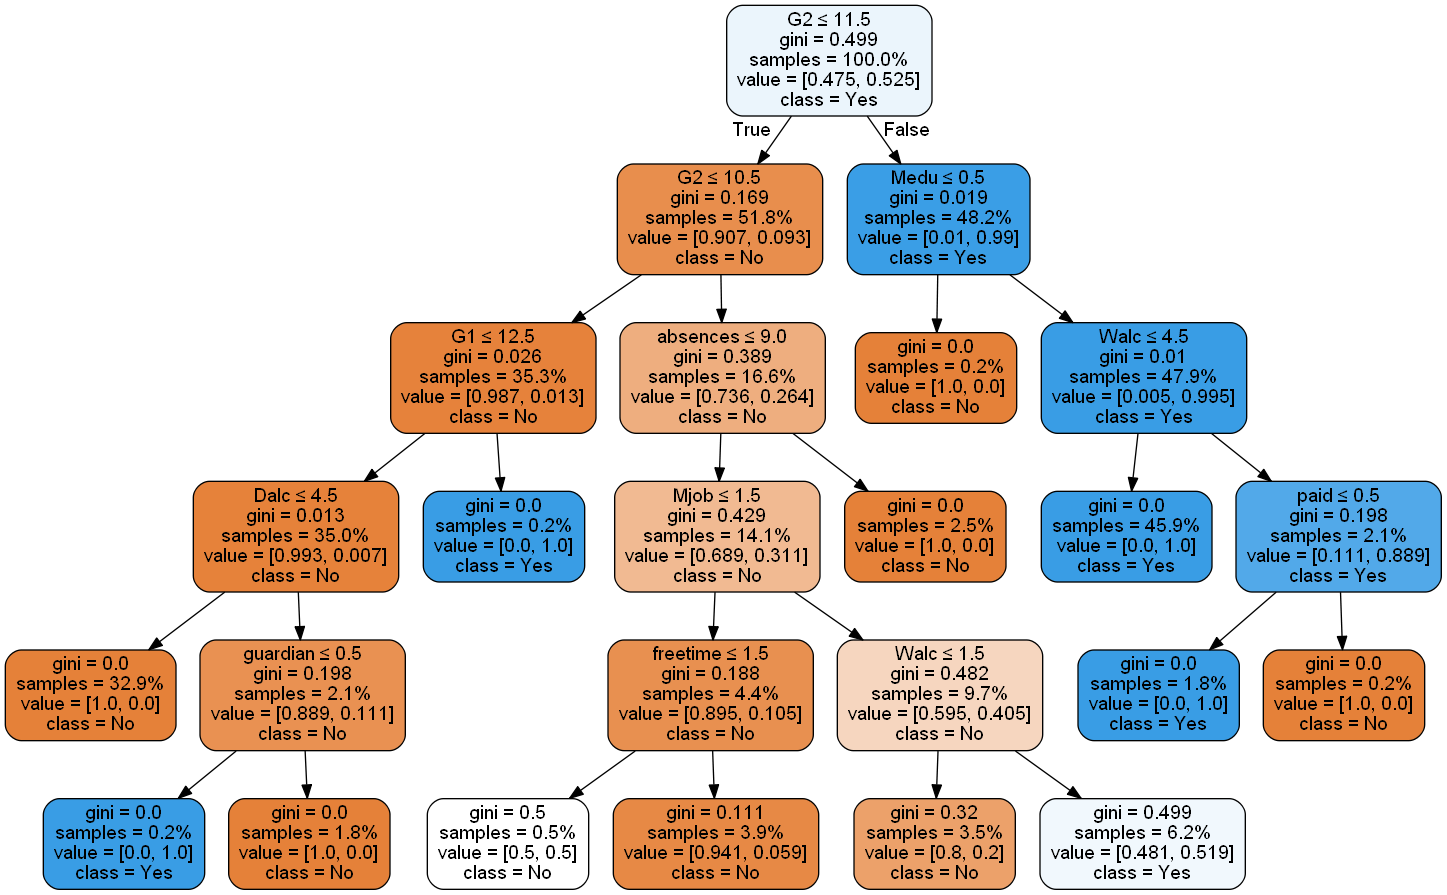

In [8]:
tree.export_graphviz(learner1,out_file='tree.dot',class_names=['No','Yes'],feature_names=x_train_1.columns, 
                         filled=True, rounded=True, special_characters=True, proportion=True)
# Note : Uncoverted Quotes (Yes) and Converted quotes (No)
Image(filename='tree.png')

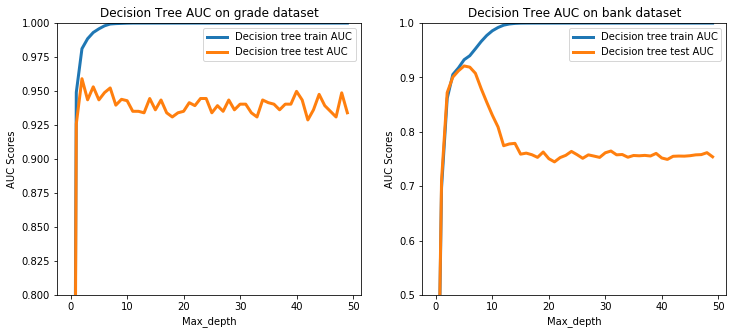

In [9]:
maxdepth = 50
tree_auc_trn1,tree_auc_tst1,tree_auc_trn2,tree_auc_tst2= np.zeros(maxdepth),\
                    np.zeros(maxdepth),np.zeros(maxdepth),np.zeros(maxdepth)
for i in range(1,maxdepth):
    clf1 = tree.DecisionTreeClassifier(criterion="gini",max_depth=i)
    clf1 = clf1.fit(x_train_1, y_train_1)
    clf2 = tree.DecisionTreeClassifier(criterion="gini",max_depth=i)
    clf2 = clf2.fit(x_train_2, y_train_2)
    tree_auc_tst1[i] = mat.roc_auc_score(y_test_1, clf1.predict_proba(x_test_1)[:,1])
    tree_auc_trn1[i] = mat.roc_auc_score(y_train_1, clf1.predict_proba(x_train_1)[:,1])
    tree_auc_tst2[i] = mat.roc_auc_score(y_test_2, clf2.predict_proba(x_test_2)[:,1])
    tree_auc_trn2[i] = mat.roc_auc_score(y_train_2, clf2.predict_proba(x_train_2)[:,1])
pyplot.figure(figsize=(12,5)) 
pyplot.subplot(1,2,1)
pyplot.title('Decision Tree AUC on grade dataset')
pyplot.plot(tree_auc_trn1, linewidth=3, label = "Decision tree train AUC")
pyplot.plot(tree_auc_tst1, linewidth=3, label = "Decision tree test AUC")
pyplot.legend()
pyplot.ylim(0.8, 1.0)
pyplot.xlabel("Max_depth")
pyplot.ylabel("AUC Scores")
pyplot.subplot(1,2,2)
pyplot.title('Decision Tree AUC on bank dataset')
pyplot.plot(tree_auc_trn2, linewidth=3, label = "Decision tree train AUC")
pyplot.plot(tree_auc_tst2, linewidth=3, label = "Decision tree test AUC")
pyplot.legend()
pyplot.ylim(0.5, 1.0)
pyplot.xlabel("Max_depth")
pyplot.ylabel("AUC Scores")
pyplot.show()

### Boosting

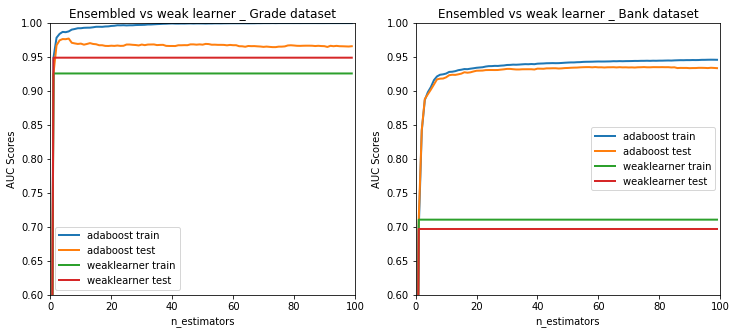

In [10]:
from sklearn import ensemble as bst
from sklearn import tree

base_tr1=tree.DecisionTreeClassifier(max_depth=3,max_leaf_nodes=2)
base_tr1.fit(x_train_1,y_train_1)
trscn1=mat.roc_auc_score(y_test_1, base_tr1.predict_proba(x_test_1)[:,1])
trsct1=mat.roc_auc_score(y_train_1, base_tr1.predict_proba(x_train_1)[:,1])
base_tr2=tree.DecisionTreeClassifier(max_depth=3,max_leaf_nodes=2)
base_tr2.fit(x_train_2,y_train_2)
trscn2=mat.roc_auc_score(y_test_2, base_tr2.predict_proba(x_test_2)[:,1])
trsct2=mat.roc_auc_score(y_train_2, base_tr2.predict_proba(x_train_2)[:,1])

max_learner=100
ada_auc_tst1,ada_auc_trn1,tree_auc_tst1,tree_auc_trn1= np.tile(np.zeros(max_learner),(4,1))
ada_auc_tst2,ada_auc_trn2,tree_auc_tst2,tree_auc_trn2= np.tile(np.zeros(max_learner),(4,1))
for i in range(1,max_learner):
    ada1 = bst.AdaBoostClassifier(base_estimator=base_tr1,learning_rate=1,n_estimators=i,algorithm="SAMME.R")
    ada1.fit(x_train_1, y_train_1)
    ada_auc_tst1[i] = mat.roc_auc_score(y_test_1, ada1.predict_proba(x_test_1)[:,1])
    ada_auc_trn1[i] = mat.roc_auc_score(y_train_1, ada1.predict_proba(x_train_1)[:,1])
    tree_auc_tst1[i]= trsct1
    tree_auc_trn1[i]= trscn1
    ada2 = bst.AdaBoostClassifier(base_estimator=base_tr2,learning_rate=1,n_estimators=i,algorithm="SAMME.R")
    ada2.fit(x_train_2, y_train_2)
    ada_auc_tst2[i] = mat.roc_auc_score(y_test_2, ada2.predict_proba(x_test_2)[:,1])
    ada_auc_trn2[i] = mat.roc_auc_score(y_train_2, ada2.predict_proba(x_train_2)[:,1])
    tree_auc_tst2[i]= trsct2
    tree_auc_trn2[i]= trscn2
    
pyplot.figure(figsize=(12,5)) 
pyplot.subplot(1,2,1)
pyplot.title('Ensembled vs weak learner _ Grade dataset')
pyplot.plot(ada_auc_trn1, linewidth=2, label = "adaboost train")
pyplot.plot(ada_auc_tst1, linewidth=2, label = "adaboost test")
pyplot.plot(tree_auc_trn1, linewidth=2, label = "weaklearner train")
pyplot.plot(tree_auc_tst1, linewidth=2, label = "weaklearner test")
pyplot.legend()
pyplot.xlim(0,100)
pyplot.ylim(0.6, 1.0)
pyplot.xlabel("n_estimators")
pyplot.ylabel("AUC Scores")
pyplot.subplot(1,2,2)
pyplot.title('Ensembled vs weak learner _ Bank dataset')
pyplot.plot(ada_auc_trn2, linewidth=2, label = "adaboost train")
pyplot.plot(ada_auc_tst2, linewidth=2, label = "adaboost test")
pyplot.plot(tree_auc_trn2, linewidth=2, label = "weaklearner train")
pyplot.plot(tree_auc_tst2, linewidth=2, label = "weaklearner test")
pyplot.legend()
pyplot.xlim(0,100)
pyplot.ylim(0.6, 1.0)
pyplot.xlabel("n_estimators")
pyplot.ylabel("AUC Scores")
pyplot.show()

### k Nearest Neighbors

In [11]:
x1_scaled=preprocessing.scale(x1)
x2_scaled=preprocessing.scale(x2)
x_train_1s, x_test_1s, y_train_1s, y_test_1s = train_test_split(x1_scaled,y1,test_size=0.33, random_state=0)
x_train_2s, x_test_2s, y_train_2s, y_test_2s = train_test_split(x2_scaled,y2,test_size=0.33, random_state=0)

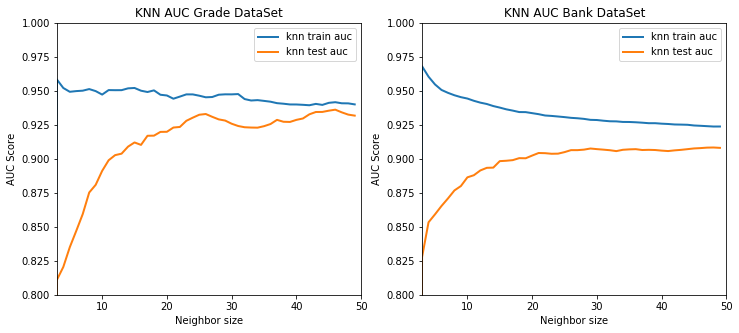

In [12]:
from sklearn import neighbors as nb

kmax=50
knn_auc_trn1,knn_auc_tst1,knn_auc_trn2,knn_auc_tst2=np.tile(np.zeros(kmax),(4,1))
for i in range(3,kmax):
    clf1=nb.KNeighborsClassifier(n_neighbors=i,algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, p=2, weights='uniform' )
    clf1 = clf1.fit(x_train_1s, y_train_1s)
    knn_auc_tst1[i] = mat.roc_auc_score(y_test_1s, clf1.predict_proba(x_test_1s)[:,1])
    knn_auc_trn1[i] = mat.roc_auc_score(y_train_1s, clf1.predict_proba(x_train_1s)[:,1])
    clf2=nb.KNeighborsClassifier(n_neighbors=i,algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, p=2, weights='uniform' )
    clf2 = clf2.fit(x_train_2s, y_train_2s)
    knn_auc_tst2[i] = mat.roc_auc_score(y_test_2s, clf2.predict_proba(x_test_2s)[:,1])
    knn_auc_trn2[i] = mat.roc_auc_score(y_train_2s, clf2.predict_proba(x_train_2s)[:,1])
    
pyplot.figure(figsize=(12,5)) 
pyplot.subplot(1,2,1)
pyplot.title('KNN AUC Grade DataSet')
pyplot.plot(knn_auc_trn1, linewidth=2, label = "knn train auc")
pyplot.plot(knn_auc_tst1, linewidth=2, label = "knn test auc")
pyplot.legend()
pyplot.xlim(3, 50)
pyplot.ylim(0.8, 1.0)
pyplot.xlabel("Neighbor size")
pyplot.ylabel("AUC Score")
pyplot.subplot(1,2,2)
pyplot.title('KNN AUC Bank DataSet')
pyplot.plot(knn_auc_trn2, linewidth=2, label = "knn train auc")
pyplot.plot(knn_auc_tst2, linewidth=2, label = "knn test auc")
pyplot.legend()
pyplot.xlim(3, 50)
pyplot.ylim(0.8, 1.0)
pyplot.xlabel("Neighbor size")
pyplot.ylabel("AUC Score")
pyplot.show()

### SVM

In [14]:
x2_slice=x2[0:300]
y2_slice=y2[0:300]
# slice the data to avoid significant time cost
x1_scaled=preprocessing.scale(x1)
x2_scaled=preprocessing.scale(x1)
from sklearn.model_selection import train_test_split
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(
     x1_scaled,y1,test_size=0.33, random_state=0)
from sklearn.model_selection import train_test_split
x_train_2, x_test_2 y_train_2, y_test_2 = train_test_split(
     x2_scaled,y2,test_size=0.33, random_state=0)
x2_scaled_slice=preprocessing.scale(x2_slice)
from sklearn.model_selection import train_test_split
x_train_2svm, x_test_2svm, y_train_2svm, y_test_2svm = train_test_split(
     x2_scaled_slice,y2_slice,test_size=0.33, random_state=0)

E:\ANACONDA3\lib\site-packages\sklearn\preprocessing\data.py:181: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


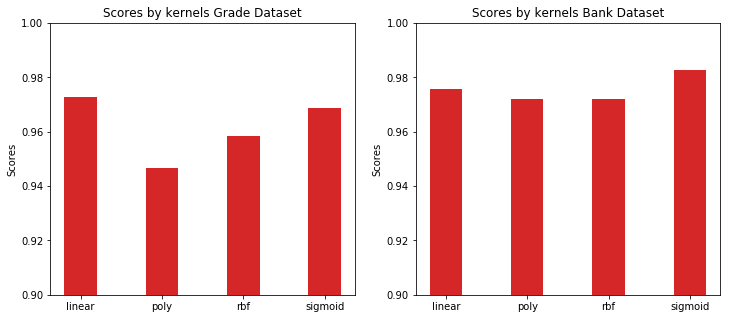

In [15]:
from sklearn import svm
svm1_auc_trn,svm1_auc_tst,act_clfscore1=[],[],[]
svm2_auc_trn,svm2_auc_tst,act_clfscore2=[],[],[]
kernels=['linear','poly','rbf','sigmoid']
for k in kernels:
    svmclf1=svm.SVC(kernel=k,probability=True)
    svmclf1.fit(x_train_1s, y_train_1s)
    act_clfscore1.append(mat.roc_auc_score(y_test_1s, svmclf1.predict_proba(x_test_1s)[:,1]))
    svmclf2=svm.SVC(kernel=k,probability=True)
    svmclf2.fit(x_train_2svm, y_train_2svm)
    act_clfscore2.append(mat.roc_auc_score(y_test_2svm, svmclf2.predict_proba(x_test_2svm)[:,1]))
pyplot.figure(figsize=(12,5)) 
pyplot.subplot(1,2,1)
pyplot.bar([1,2,3,4], act_clfscore1, 0.4, color='#d62728')
pyplot.ylabel('Scores')
pyplot.title('Scores by kernels Grade Dataset')
pyplot.xticks([1,2,3,4], kernels)
pyplot.yticks(np.arange(0, 1.01, 0.02))
pyplot.ylim(0.9, 1.0)
pyplot.subplot(1,2,2)
pyplot.bar([1,2,3,4], act_clfscore2, 0.4, color='#d62728')
pyplot.ylabel('Scores')
pyplot.title('Scores by kernels Bank Dataset')
pyplot.xticks([1,2,3,4], kernels)
pyplot.yticks(np.arange(0, 1.01, 0.02))
pyplot.ylim(0.9, 1.0)
pyplot.show()

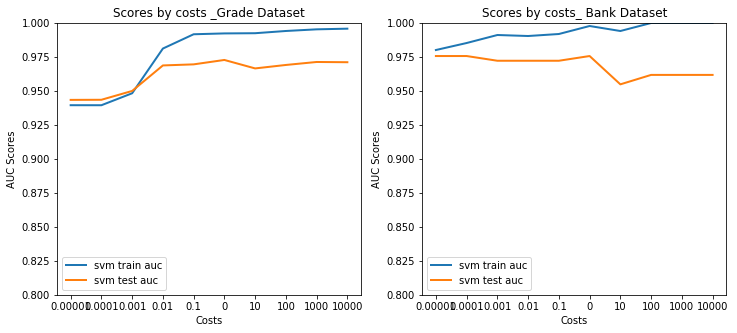

In [16]:
costs = np.power(10.0, range(-5,5))
svm1_auc_tst,svm1_auc_trn,svm2_auc_tst,svm2_auc_trn  = np.tile(np.zeros(len(costs)),(4,1))
for i in range(len(costs)):
    svmclf1 = svm.SVC(kernel = 'linear', C=costs[i], probability=True)
    svmclf1=svmclf1.fit(x_train_1s,y_train_1s)
    svm1_auc_tst[i] = mat.roc_auc_score(y_test_1s, svmclf1.predict_proba(x_test_1s)[:,1])
    svm1_auc_trn[i] = mat.roc_auc_score(y_train_1s, svmclf1.predict_proba(x_train_1s)[:,1])
    svmclf2 = svm.SVC(kernel = 'linear', C=costs[i], probability=True)
    svmclf2=svmclf2.fit(x_train_2svm,y_train_2svm)
    svm2_auc_tst[i] = mat.roc_auc_score(y_test_2svm, svmclf2.predict_proba(x_test_2svm)[:,1])
    svm2_auc_trn[i] = mat.roc_auc_score(y_train_2svm, svmclf2.predict_proba(x_train_2svm)[:,1])
pyplot.figure(figsize=(12,5)) 
pyplot.subplot(1,2,1)
pyplot.title('Scores by costs _Grade Dataset')
pyplot.plot(svm1_auc_trn, linewidth=2, label = "svm train auc")
pyplot.plot(svm1_auc_tst, linewidth=2, label = "svm test auc")
pyplot.legend()
pyplot.xticks(range(len(costs)),['0.00001','0.0001','0.001','0.01','0.1','0','10','100','1000','10000','100000'])
pyplot.ylim(0.8, 1.0)
pyplot.xlabel("Costs")
pyplot.ylabel("AUC Scores")
pyplot.subplot(1,2,2)
pyplot.title('Scores by costs_ Bank Dataset')
pyplot.plot(svm2_auc_trn, linewidth=2, label = "svm train auc")
pyplot.plot(svm2_auc_tst, linewidth=2, label = "svm test auc")
pyplot.legend()
pyplot.xticks(range(len(costs)),['0.00001','0.0001','0.001','0.01','0.1','0','10','100','1000','10000','100000'])
pyplot.ylim(0.8, 1.0)
pyplot.xlabel("Costs")
pyplot.ylabel("AUC Scores")
pyplot.show()

### Neuron Networks

In [17]:
from sklearn.preprocessing import StandardScaler  
scaler =StandardScaler()  
scaler.fit(x_train_1)  
x_train_1n = scaler.transform(x_train_1)  
x_test_1n = scaler.transform(x_test_1) 
y_train_1n=y_train_1
y_test_1n=y_test_1
x2_slice=x2[2000:3000]
y2_slice=y2[2000:3000]
from sklearn.model_selection import train_test_split
x_train_2n, x_test_2n, y_train_2n, y_test_2n = train_test_split(
     x2_slice,y2_slice,test_size=0.33, random_state=0)
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(x_train_2n)  
x_train_2n = scaler.transform(x_train_2n)  
x_test_2n = scaler.transform(x_test_2n)  

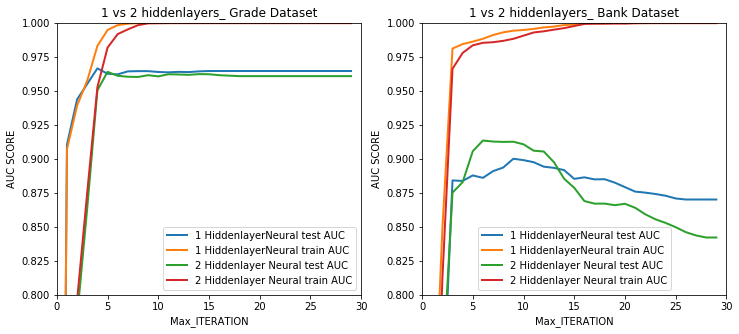

In [18]:
from sklearn import neural_network as nw

itermax=30
nw_auc_trn1,nw_auc_tst1,nw_auc_trn2,nw_auc_tst2=np.tile(np.zeros(itermax),(4,1))
nw_auc_trn3,nw_auc_tst3,nw_auc_trn4,nw_auc_tst4=np.tile(np.zeros(itermax),(4,1))
for i in range(1,itermax):
    clf1= nw.MLPClassifier(solver='lbfgs',max_iter=i,alpha=1e-5,hidden_layer_sizes=(50), random_state=1)
    clf1 = clf1.fit(x_train_1n, y_train_1n)
    nw_auc_tst1[i] = mat.roc_auc_score(y_test_1n, clf1.predict_proba(x_test_1n)[:,1])
    nw_auc_trn1[i] = mat.roc_auc_score(y_train_1n, clf1.predict_proba(x_train_1n)[:,1])
    clf2= nw.MLPClassifier(solver='lbfgs',max_iter=i,alpha=1e-5,hidden_layer_sizes=(50, 50), random_state=1)
    clf2 = clf2.fit(x_train_1n, y_train_1n)
    nw_auc_tst2[i] = mat.roc_auc_score(y_test_1n, clf2.predict_proba(x_test_1n)[:,1])
    nw_auc_trn2[i] = mat.roc_auc_score(y_train_1n, clf2.predict_proba(x_train_1n)[:,1])
    clf3= nw.MLPClassifier(solver='lbfgs',max_iter=i,alpha=1e-5,hidden_layer_sizes=(50), random_state=1)
    clf3 = clf3.fit(x_train_2n, y_train_2n)
    nw_auc_tst3[i] = mat.roc_auc_score(y_test_2n, clf3.predict_proba(x_test_2n)[:,1])
    nw_auc_trn3[i] = mat.roc_auc_score(y_train_2n, clf3.predict_proba(x_train_2n)[:,1])
    clf4= nw.MLPClassifier(solver='lbfgs',max_iter=i,alpha=1e-5,hidden_layer_sizes=(50, 50), random_state=1)
    clf4 = clf4.fit(x_train_2n, y_train_2n)
    nw_auc_tst4[i] = mat.roc_auc_score(y_test_2n, clf4.predict_proba(x_test_2n)[:,1])
    nw_auc_trn4[i] = mat.roc_auc_score(y_train_2n, clf4.predict_proba(x_train_2n)[:,1])

pyplot.figure(figsize=(12,5)) 
pyplot.subplot(1,2,1)
pyplot.title('1 vs 2 hiddenlayers_ Grade Dataset')
pyplot.plot(nw_auc_tst1, linewidth=2, label = "1 HiddenlayerNeural test AUC")
pyplot.plot(nw_auc_trn1, linewidth=2, label = "1 HiddenlayerNeural train AUC")
pyplot.plot(nw_auc_tst2, linewidth=2, label = "2 Hiddenlayer Neural test AUC")
pyplot.plot(nw_auc_trn2, linewidth=2, label = "2 Hiddenlayer Neural train AUC")
pyplot.legend()
pyplot.xlim(0, 30)
pyplot.ylim(0.8, 1.0)
pyplot.xlabel("Max_ITERATION")
pyplot.ylabel("AUC SCORE")
pyplot.subplot(1,2,2)
pyplot.title('1 vs 2 hiddenlayers_ Bank Dataset')
pyplot.plot(nw_auc_tst3, linewidth=2, label = "1 HiddenlayerNeural test AUC")
pyplot.plot(nw_auc_trn3, linewidth=2, label = "1 HiddenlayerNeural train AUC")
pyplot.plot(nw_auc_tst4, linewidth=2, label = "2 Hiddenlayer Neural test AUC")
pyplot.plot(nw_auc_trn4, linewidth=2, label = "2 Hiddenlayer Neural train AUC")
pyplot.legend()
pyplot.xlim(0, 30)
pyplot.ylim(0.8, 1.0)
pyplot.xlabel("Max_ITERATION")
pyplot.ylabel("AUC SCORE")
pyplot.show()

### Conclusion